## Our First CNN in Kerasm
Creating a model based on the MNIST Dataset of Handwrittent Digits

## Step 1: Lets load our dataset

In [3]:
from keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print (x_train.shape)

(60000, 28, 28)


### Step 2A: Examine the size and image dimenions (not required but good practice)
- Check the number of samples, dimenions and whether images are color or grayscale
- We see that our training data consist of 60,000 samples of training data, 10,000 samples of test data
- Our labels are appropriately sized as well
- Our Image dimenions are 28 x 28, with no color channels (i.e. they are grayscale, so no BGR channels)

In [5]:
print("Initial Shape or dimension of x_train:",x_train.shape)
print("No of samples in our training data:", str(len(x_train)))
print("No of labels in our training data:", str(len(y_train)))
print("No of samples in our test data:", str(len(x_test)))
print("No of labels in our test data:", str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial Shape or dimension of x_train: (60000, 28, 28)
No of samples in our training data: 60000
No of labels in our training data: 60000
No of samples in our test data: 10000
No of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


### Step 2B - Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

In [9]:
#using opencv
import cv2
import numpy as np

for i in range(0,6):
    random_num = np.random.randint(0,len(x_train))
    img = x_train[random_num]
    window_name = "Random Sample" + str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

### Step 3A - Prepare our dataset for training

In [10]:
# Let store the no of rows and columns
img_row = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)

x_train = x_train.reshape(x_train.shape[0], img_row,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_row,img_cols,1)

# store the shape of the single image
input_shape = (img_row,img_cols,1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalise our data by changing the range from (0 to 255) (0 to 1)
x_train /=255
x_test /=255

print("x_train shape:", x_train.shape)
print("train sample", x_train.shape[0])
print("test sample", x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
train sample 60000
test sample 10000


### Step 3B - One Hot Encode Our Labels (Y)

In [11]:
from keras.utils import np_utils

# Now we one hot encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Step 4 - Create Our Model
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [22]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k
from keras.optimizers import SGD

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

### Step 5 - Train our Model
- We place our formatted data as the inputs and set the batch size, number of epochs
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [23]:
batch_size = 32
epochs = 10

history= model.fit(x_train,
                  y_train,
                  batch_size = batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])


Epoch 1/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.5816 - accuracy: 0.8180 - val_loss: 0.1965 - val_accuracy: 0.9418
Epoch 2/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.2952 - accuracy: 0.9121 - val_loss: 0.1421 - val_accuracy: 0.9565
Epoch 3/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.2281 - accuracy: 0.9327 - val_loss: 0.1118 - val_accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.1813 - accuracy: 0.9456 - val_loss: 0.0842 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1448 - accuracy: 0.9566 - val_loss: 0.0708 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1242 - accuracy: 0.9637 - val_loss: 0.0611 - val_accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1104 - accuracy: 0.9672 - val_loss: 0

### Step 6 - Ploting our Loss and Accuracy Charts

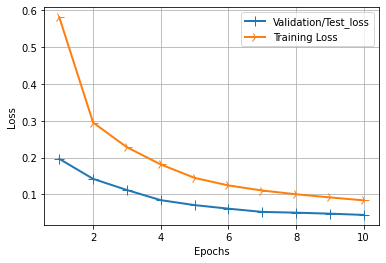

In [26]:
# plot our loss charts

import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test_loss')
line2 = plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2,linewidth=2.0,marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'acc'

## Step 7A - Saving our Model

In [42]:
model.save("8_mnist_simple_cnn_10_Epochs.h5")

## Step 7B - Loading our Model

In [44]:
from keras.models import load_model

classifier = load_model('Trained_Models/8_mnist_simple_cnn_10_Epochs.h5')

### Step 8 - Lets input some of our test data into our classifer

In [45]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
